In [1]:
import pandas as pd

In [2]:
res = pd.read_csv('./result.txt')

In [4]:
res

,graph,max_color,answer,has_answer,method,solved,message,cost_function,time
0,1_1,2,2,1,systematic_search,1,solved,0,0.000100
1,1_1,2,2,1,greedy_search,1,solved,0,0.000057
2,1_1,2,2,1,SA,1,solved,0,0.022342
3,1_1,3,2,1,systematic_search,1,solved,0,0.000094
4,1_1,3,2,1,greedy_search,1,solved,0,0.000059
5,1_1,3,2,1,SA,1,solved,0,0.028437
6,1_1,4,2,1,systematic_search,1,solved,0,0.000100
7,1_1,4,2,1,greedy_search,1,solved,0,0.000056
8,1_1,4,2,1,SA,1,solved,0,0.026211
9,1_1,5,2,1,systematic_search,1,solved,0,0.000094


In [6]:
res[res['has_answer'] == 1 & res['cost_function'] > 0]

,graph,max_color,answer,has_answer,method,solved,message,cost_function,time
58,2_1,6,3,1,greedy_search,0,local_optima_reached,1,0.000286
100,3_1,5,5,1,greedy_search,0,local_optima_reached,27,0.000314
103,3_1,6,5,1,greedy_search,0,local_optima_reached,21,0.000285


In [12]:
res_gs = res[res['method'] == 'greedy_search']
len(res_gs[(res_gs['has_answer'] == 1) & (res_gs['cost_function'] > 0)])

3

In [13]:
res_sa = res[res['method'] == 'SA']
len(res_sa[(res_sa['has_answer'] == 1) & (res_sa['cost_function'] > 0)])

0

In [44]:
from matplotlib import pyplot as plt
query = res[(res['has_answer'] == 1) & (res['max_color'] == res['answer']) & res['solved'] == 1]
query1 = query.loc[query['method'] == 'systematic_search', ['graph', 'time']].set_index(['graph'])
query2 = query.loc[query['method'] == 'greedy_search', ['graph', 'time']].set_index(['graph'])
query3 = query.loc[query['method'] == 'SA', ['graph', 'time']].set_index(['graph'])

In [51]:
import numpy as np
df2 = pd.DataFrame()
df2['graph'] = query1.index
df2['systematic_search'] = np.zeros(len(df2))
df2['greedy_search'] = np.zeros(len(df2))
df2['SA'] = np.zeros(len(df2))
df2 = df2.set_index(['graph'])
for g in query1.index:
    df2.loc[g, 'systematic_search'] = query1.loc[g, 'time']
for g in query2.index:
    df2.loc[g, 'greedy_search'] = query2.loc[g, 'time']
for g in query3.index:
    df2.loc[g, 'SA'] = query3.loc[g, 'time']

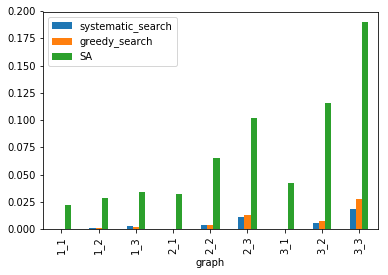

In [54]:
df2.plot.bar()

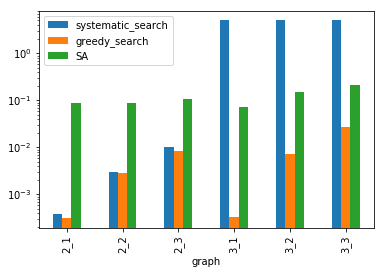

In [59]:
query = res[(res['has_answer'] == 0) & (res['max_color'] == res['answer'] - 1)]
query1 = query.loc[query['method'] == 'systematic_search', ['graph', 'time']].set_index(['graph'])
query2 = query.loc[query['method'] == 'greedy_search', ['graph', 'time']].set_index(['graph'])
query3 = query.loc[query['method'] == 'SA', ['graph', 'time']].set_index(['graph'])
df2 = pd.DataFrame()
df2['graph'] = query1.index
df2['systematic_search'] = np.zeros(len(df2))
df2['greedy_search'] = np.zeros(len(df2))
df2['SA'] = np.zeros(len(df2))
df2 = df2.set_index(['graph'])
for g in query1.index:
    df2.loc[g, 'systematic_search'] = query1.loc[g, 'time']
for g in query2.index:
    df2.loc[g, 'greedy_search'] = query2.loc[g, 'time']
for g in query3.index:
    df2.loc[g, 'SA'] = query3.loc[g, 'time']
df2.plot.bar(log=True)

In [56]:
query

,graph,max_color,answer,has_answer,method,solved,message,cost_function,time
45,2_1,2,3,0,systematic_search,0,no_solution,250,0.000392
46,2_1,2,3,0,greedy_search,0,local_optima_reached,52,0.000313
47,2_1,2,3,0,SA,0,max_iteration_reached,52,0.087276
60,2_2,2,3,0,systematic_search,0,no_solution,6393,0.002986
61,2_2,2,3,0,greedy_search,0,local_optima_reached,1265,0.002805
62,2_2,2,3,0,SA,0,max_iteration_reached,1265,0.088617
75,2_3,2,3,0,systematic_search,0,no_solution,25173,0.010000
76,2_3,2,3,0,greedy_search,0,local_optima_reached,9507,0.008246
77,2_3,2,3,0,SA,0,max_iteration_reached,5006,0.105471
96,3_1,4,5,0,systematic_search,0,time_limit_exceed,-1,5.000000
